In [1]:
!pip install pandas openpyxl konlpy wordcloud matplotlib gensim

In [4]:
# ===============================
# 0. 라이브러리 설치 (처음 한 번만)
# ===============================
# !pip install pandas openpyxl konlpy wordcloud matplotlib gensim

import pandas as pd
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from gensim import corpora, models

# ===============================
# 1. 엑셀 불러오기
# ===============================
# 엑셀 파일: 'articles.xlsx'
# 텍스트가 들어있는 컬럼 이름은 'content'라고 가정
df = pd.read_csv("/content/Wcloud_topic_modeling.csv")
texts = df["content"].dropna().tolist()

In [5]:
# ===============================
# 2. 형태소 분석 (명사 추출)
# ===============================
okt = Okt()
tokenized_texts = []

for text in texts:
    tokens = okt.nouns(text)  # 명사만 추출
    tokens = [t for t in tokens if len(t) > 1]  # 한 글자 단어 제거
    tokenized_texts.append(tokens)

In [9]:
# ===============================
# 3. 워드클라우드
# ===============================
import os

font_path = "/content/NanumGothic.ttf"

if os.path.exists(font_path):
    print(f"Font file found at: {font_path}")
else:
    print(f"Font file not found at: {font_path}")
    print("Please upload the font file to this location.")

Font file not found at: /usr/share/fonts/truetype/nanum/NanumGothic.ttf
Please upload the font file to this location.


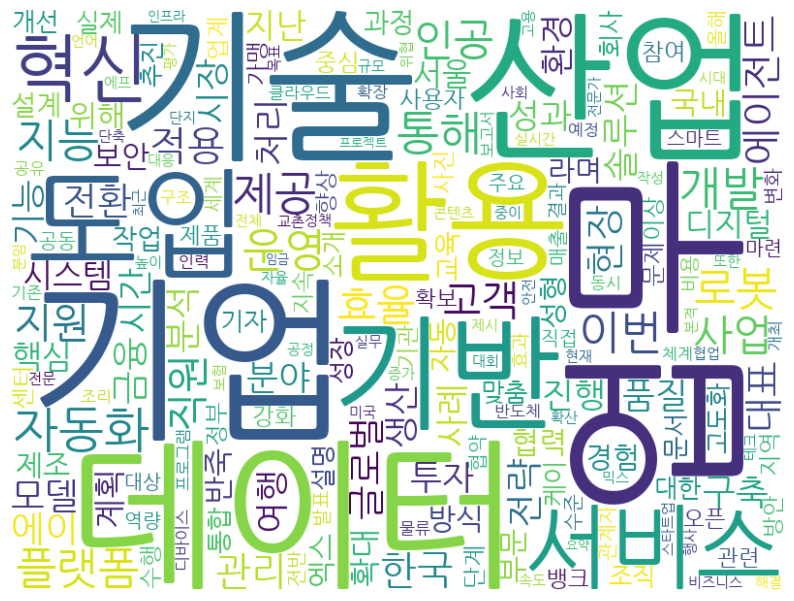

In [10]:
all_tokens = [token for sublist in tokenized_texts for token in sublist]
counter = Counter(all_tokens)

wc = WordCloud(
    font_path="/content/NanumGothic.ttf",  # 한글 폰트 경로
    background_color="white",
    width=800,
    height=600
)
plt.figure(figsize=(10,8))
plt.imshow(wc.generate_from_frequencies(counter), interpolation="bilinear")
plt.axis("off")
plt.show()

In [11]:
# ===============================
# 4. 토픽 모델링 (LDA)
# ===============================
# 단어 사전 & 말뭉치 생성
dictionary = corpora.Dictionary(tokenized_texts)
corpus = [dictionary.doc2bow(text) for text in tokenized_texts]

# LDA 모델 학습 (토픽 5개 가정)
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=10)

# 토픽 출력
for idx, topic in lda_model.print_topics(num_words=10):
    print(f"토픽 {idx}: {topic}")


토픽 0: 0.017*"산업" + 0.014*"기술" + 0.011*"업무" + 0.011*"데이터" + 0.010*"활용" + 0.008*"혁신" + 0.008*"기반" + 0.008*"한국" + 0.007*"자동화" + 0.006*"기업"
토픽 1: 0.010*"업무" + 0.009*"기업" + 0.008*"에이전트" + 0.008*"솔루션" + 0.006*"도입" + 0.006*"생산" + 0.006*"회사" + 0.005*"대표" + 0.005*"제공" + 0.005*"기술"
토픽 2: 0.012*"여행" + 0.011*"기반" + 0.010*"지능" + 0.009*"기업" + 0.009*"인공" + 0.009*"혁신" + 0.007*"업무" + 0.007*"데이터" + 0.007*"운영" + 0.007*"글로벌"
토픽 3: 0.014*"기업" + 0.014*"업무" + 0.011*"데이터" + 0.011*"에이" + 0.009*"플랫폼" + 0.009*"에이전트" + 0.008*"서비스" + 0.007*"활용" + 0.007*"기반" + 0.007*"투자"
토픽 4: 0.021*"로봇" + 0.015*"업무" + 0.015*"반죽" + 0.013*"도입" + 0.010*"가맹" + 0.010*"부문" + 0.009*"품질" + 0.009*"자동화" + 0.009*"조리" + 0.008*"효율"


In [12]:
for i, row in enumerate(lda_model[corpus]):
    print(f"문서 {i} 토픽 분포: {row}")

문서 0 토픽 분포: [(0, 0.26018918), (3, 0.20238958), (4, 0.5342178)]
문서 1 토픽 분포: [(1, 0.99490553)]
문서 2 토픽 분포: [(3, 0.99624234)]
문서 3 토픽 분포: [(1, 0.996003)]
문서 4 토픽 분포: [(4, 0.9935567)]
문서 5 토픽 분포: [(2, 0.9959947)]
문서 6 토픽 분포: [(0, 0.0834426), (3, 0.56643355), (4, 0.34853974)]
문서 7 토픽 분포: [(2, 0.9952243)]
문서 8 토픽 분포: [(1, 0.9968895)]
문서 9 토픽 분포: [(4, 0.9944346)]
문서 10 토픽 분포: [(1, 0.998288)]
문서 11 토픽 분포: [(0, 0.9576658), (4, 0.039058864)]
문서 12 토픽 분포: [(4, 0.9877408)]
문서 13 토픽 분포: [(1, 0.994922)]
문서 14 토픽 분포: [(4, 0.9935431)]
문서 15 토픽 분포: [(0, 0.08269338), (4, 0.91403234)]
문서 16 토픽 분포: [(4, 0.9947696)]
문서 17 토픽 분포: [(4, 0.99385345)]
문서 18 토픽 분포: [(0, 0.7665411), (3, 0.23010282)]
문서 19 토픽 분포: [(0, 0.16181138), (3, 0.3388807), (4, 0.4971274)]
문서 20 토픽 분포: [(0, 0.99232477)]
문서 21 토픽 분포: [(0, 0.24487045), (2, 0.6393694), (3, 0.11417814)]
문서 22 토픽 분포: [(3, 0.9954606)]
문서 23 토픽 분포: [(0, 0.08644168), (4, 0.911006)]
문서 24 토픽 분포: [(3, 0.99800485)]
문서 25 토픽 분포: [(0, 0.024875924), (2, 0.110845245), (4, 

In [14]:
!pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 30.0 MB/s eta 0:00:00


In [15]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

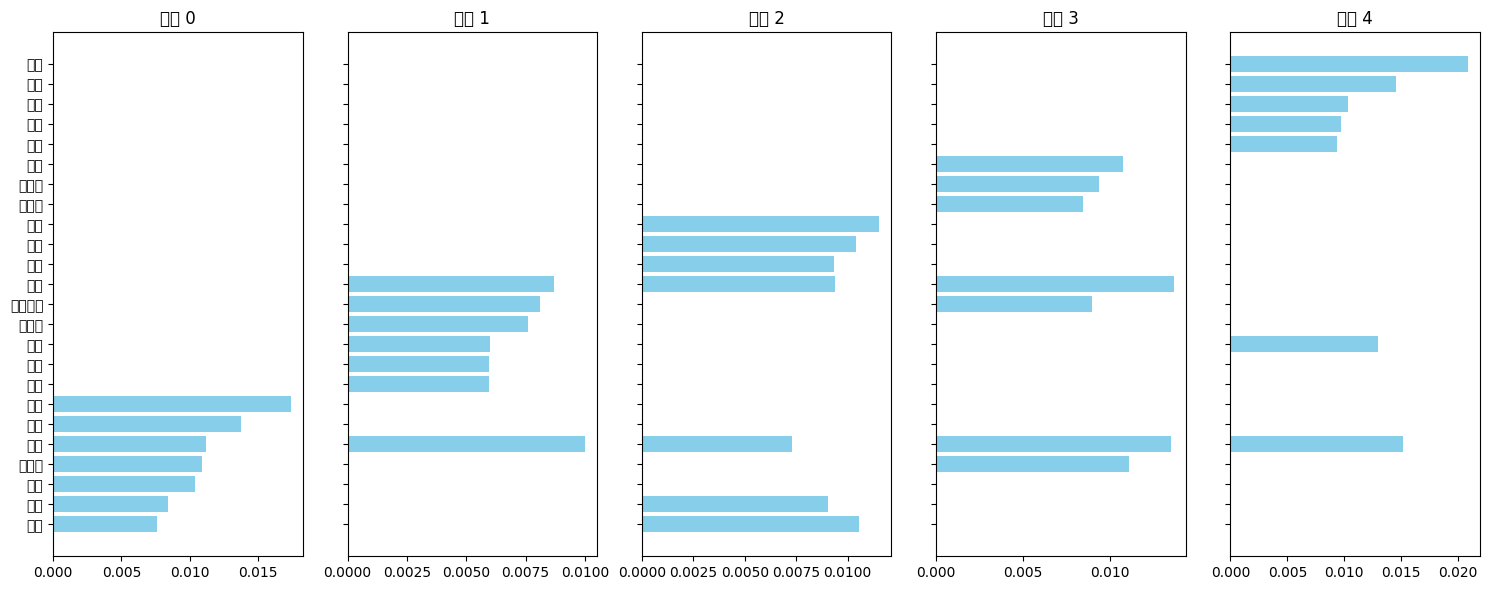

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# 토픽별 상위 단어 추출
topics = lda_model.show_topics(formatted=False, num_words=7)

fig, axes = plt.subplots(1, len(topics), figsize=(15, 6), sharey=True)

font_path="/content/NanumGothic.ttf"

for i, (topic_id, words) in enumerate(topics):
    df = pd.DataFrame(words, columns=["단어", "가중치"])
    df = df.sort_values("가중치", ascending=True)

    axes[i].barh(df["단어"], df["가중치"], color="skyblue")
    axes[i].set_title(f"토픽 {topic_id}")

plt.tight_layout()
plt.show()

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

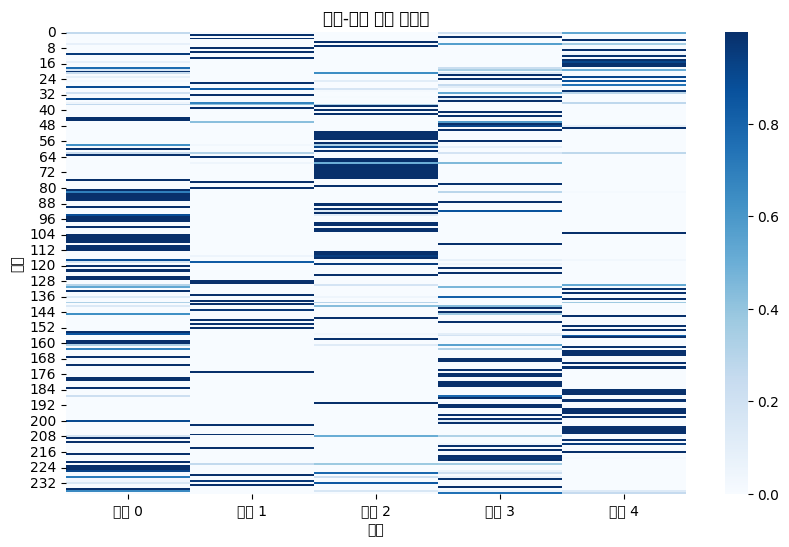

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [19]:
import seaborn as sns

# 문서별 토픽 분포 계산
doc_topics = [lda_model.get_document_topics(bow) for bow in corpus]

# 행: 문서, 열: 토픽
matrix = []
for row in doc_topics:
    row_dict = {topic_id: prob for topic_id, prob in row}
    matrix.append([row_dict.get(i, 0) for i in range(lda_model.num_topics)])

df = pd.DataFrame(matrix, columns=[f"토픽 {i}" for i in range(lda_model.num_topics)])

plt.figure(figsize=(10,6))
sns.heatmap(df, cmap="Blues", cbar=True)
plt.title("문서-토픽 분포 히트맵")
plt.xlabel("토픽")
plt.ylabel("문서")
plt.show()